### 単回帰問題
http://tkengo.github.io/blog/2016/01/04/yaruo-machine-learning2/

説明中の攻撃力-実際に与えるダメージの教師データと初期予測を描画

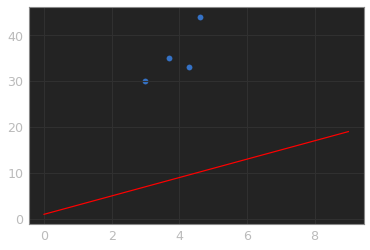

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#教師データ
X = np.array([[3.0,30],
              [3.7,35],
              [4.3,33],
              [4.6, 44]
             ]);
plt.scatter(X[:,0],X[:,1])

#初期θ
th0 = 1
th1 = 2

x2 = np.arange(0, 10)
y2 = th0 + th1*x2;

plt.plot(x2, y2, c="red");


青プロットがサンプル 

赤が初期予測データ f_θ(x)

赤の直線を青のサンプルにフッティングするため、誤差を減らしていく

yを教師データ（青）として

|y - f_θ(x)|
を小さくするθを発見する

誤差を表す関数は、全ての教師データ(x_i, y_i)(i=0~n)に対して

E(θ) = (1/2)(yi - fθ (xi ))^2

In [63]:
#今仮定している予測データで誤差を出してみる
E = 0
for x,y in X:    
    f_xi = th0 * 1 + th1 * x 
    E = E + 1.0/2.0 * (y - f_xi)**2
print("~θ = ({0},{1})".format(th0,th1))
print("E(θ) =",E)

~θ = (1,2)
E(θ) = 1463.28


このEを、~θについて小さくしていく

このようなEを、目的変数と呼ぶ

#### 最急降下法

例えば二次関数y = 2x + 1について、最急降下法を適用し、極小値を求めるとすると、以下の式に従い変数xを更新する。

x_new  = x_old-η*dy/dx 

多変数の場合でも偏微分として同様にできる。
すなわち、変数に対して適当な初期値から初めて、目的変数を偏微分した傾きを古い値から引く→新たな値とするという更新を繰り返す。



[1, 2]
[2.0680000000000001, 6.2351999999999999]
[2.4325888, 7.6635683199999995]
[2.55976859008, 8.1446159765120001]
[2.6068177541409279, 8.3059384767019395]
[2.6268186416097881, 8.3593528606799659]
[2.637686849679322, 8.3763485792409487]
[2.6454689973305614, 8.3810537263921674]
[2.6522058561201609, 8.3816116697757224]
[2.6585862013903419, 8.3807708412827928]


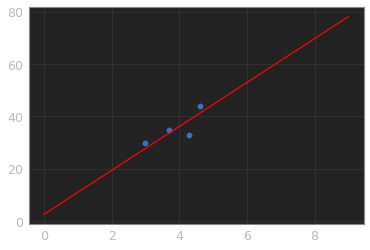

In [79]:
#th0, th1を更新していく
#dE/dθ0, dE/dθ1を求める

#このセル用に傾きを初期化
th0 = 1
th1 = 2

#η 更新の速さを決める係数
eta = 0.01
#10回更新
for i in range(0,10):
    print([th0,th1])
    E_grad0 = 0
    for x,y in X:    
        f_xi = th0 * 1 + th1 * x 
        E_grad0 = E_grad0 + (f_xi - y)
    E_grad1 = 0
    for x,y in X:
        f_xi = th0 * 1 + th1 * x 
        E_grad1 = E_grad1 + (f_xi - y) * x
    th0 = th0 - eta * E_grad0
    th1 = th1 - eta * E_grad1

plt.scatter(X[:,0],X[:,1])

x2 = np.arange(0, 10)
y2 = th0 + th1*x2;

plt.plot(x2, y2, c="red");
    
    

#### 多項式回帰と重回帰

##### 多項式回帰
上記のf(θ, x)において、fがxの多項式になっている場合

例：
攻撃力に対して与えるダメージが決まるが、実は計算式は二次関数だった

$f = th0 + th1*x + th2*x^2$

予測対象の関数がn次関数となるため、曲線でのフィッティングが可能


##### 重回帰
予測対象の関数fが多変数関数のとき

この多変数のことを素性とも呼ぶ

例：
攻撃力だけでなく、LVや体力も与えるダメージに関わる変数だった

$f = th0 + th1*x + th2*y + th3*z$

$f = th0*x0 + th1*x1 + th2*x2 + th3*x3$　$(x0=1)$

と書いてもいい（このxiのiはこの前セルまでのサンプル番号を表すiとは異なるため注意）



#### (参考)パーセプトロンとロジスティック回帰

パーセプトロンとロジスティック回帰は別々に解説されることも多いが、モデルとして等価である

参考に、やる夫で解説されている(単相)パーセプトロンは活性化関数の出力が0または1で、重みを更新していく。

この時、うまく線形分離可能な方向に重みが動くように活性化関数の出力と更新式を形作るのでフィッティングする

ロジスティック回帰は、活性化関数の出力はシグモイド関数になり、重み（パラメータθ）は全てのサンプルが正解ラベルに属する同時確率が最大になるように最大化される。このとき、確率を最大化するようにパラメータθを最大化するので、尤度として扱われる。